In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import load_phishing, load_mushrooms, load_german, load_w1a, load_w3a, load_a2a
from models import LogisticRegression
from ml_utils import run_solvers, optim_data, run_bench, optim_bench, models_summary, diagnostic
#from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_2644\2961552409.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
C = 1

# w1a

In [3]:
data_w1a = load_w1a()

X_train = (2477, 300), y_train = (2477,)
X_test = (47272, 300), y_test = (47272,)
Class distribution: {-1.0: 0.9709325797335486, 1.0: 0.029067420266451354}
sklearn train score: 0.985466
sklearn test score: 0.977746
sklearn balanced train score: 0.750000
sklearn balanced test score: 0.669902
sklearn sol norm: 9.093165544628532


In [4]:
#CDiab = 1
Mw1a = 32
#kDiab = 200
print(f"Iterations: {data_w1a[1].size / Mw1a}")

Iterations: 77.40625


## Benchmark

In [5]:
benchw1a = run_bench(data_w1a, C)

benchw1a_data = optim_bench(benchw1a)

## SGD

In [6]:
# BatchGD-Fixed
batchfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, data_w1a[1].size)

# SGD-Fixed
sgdfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, Mw1a)

# SGD-Decreasing
sgddecre_w1a = run_solvers("SGD-Decreasing", C, data_w1a, Mw1a)

# SGDM
sgdm_w1a = run_solvers("SGDM", C, data_w1a, Mw1a)

In [7]:
# SGD-Armijo
sgdarmijo_w1a = run_solvers("SGD-Armijo", C, data_w1a, Mw1a, delta_a=0.5, gamma_a=0.01)

# MSL-SGDM-C
mslc_w1a = run_solvers("MSL-SGDM-C", C, data_w1a, Mw1a, delta_a=0.5, gamma_a=0.01, delta_m=0.9)

# MSL-SGDM-R
mslr_w1a = run_solvers("MSL-SGDM-R", C, data_w1a, Mw1a, delta_a=0.5, gamma_a=0.01, delta_m=0.9)

In [8]:
modelsw1a_data = optim_data(batchfixed_w1a + sgdfixed_w1a + sgddecre_w1a + sgdm_w1a + sgdarmijo_w1a + mslc_w1a + mslr_w1a)

## Summary

In [9]:
models_summary(modelsw1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.537485,6.506986e-06,NaN,6,0.970933,0.970236,0.500000,0.500000,0.439818
3,SGD-Fixed,1,2477.0,1.00,0.0,0.537485,3.958629e-16,0.165998,200,0.970933,0.970236,0.500000,0.500000,0.439818
4,SGD-Fixed,1,2477.0,0.10,0.0,0.537485,6.341960e-09,0.165005,200,0.970933,0.970236,0.500000,0.500000,0.439818
0,L-BFGS-B,1,NaN,NaN,NaN,0.537485,1.424674e-06,NaN,7,0.970933,0.970236,0.500000,0.500000,0.439818
2,CG,1,NaN,NaN,NaN,0.537485,2.222710e-05,NaN,8,0.970933,0.970236,0.500000,0.500000,0.439813
10,SGD-Decreasing,1,32.0,0.10,0.0,0.537485,6.411930e-05,2.768852,200,0.970933,0.970236,0.500000,0.500000,0.439828
9,SGD-Decreasing,1,32.0,1.00,0.0,0.537485,1.207430e-03,2.737399,200,0.970933,0.970236,0.500000,0.500000,0.440061
13,SGDM,1,32.0,0.10,0.9,0.537488,2.835879e-03,2.767639,200,0.970933,0.970236,0.500000,0.500000,0.440306
8,SGD-Fixed,1,32.0,0.01,0.0,0.537488,2.864462e-03,2.745919,200,0.970933,0.970236,0.500000,0.500000,0.440364
14,SGDM,1,32.0,0.01,0.9,0.537489,2.855792e-03,2.717635,200,0.970933,0.970236,0.500000,0.500000,0.439835


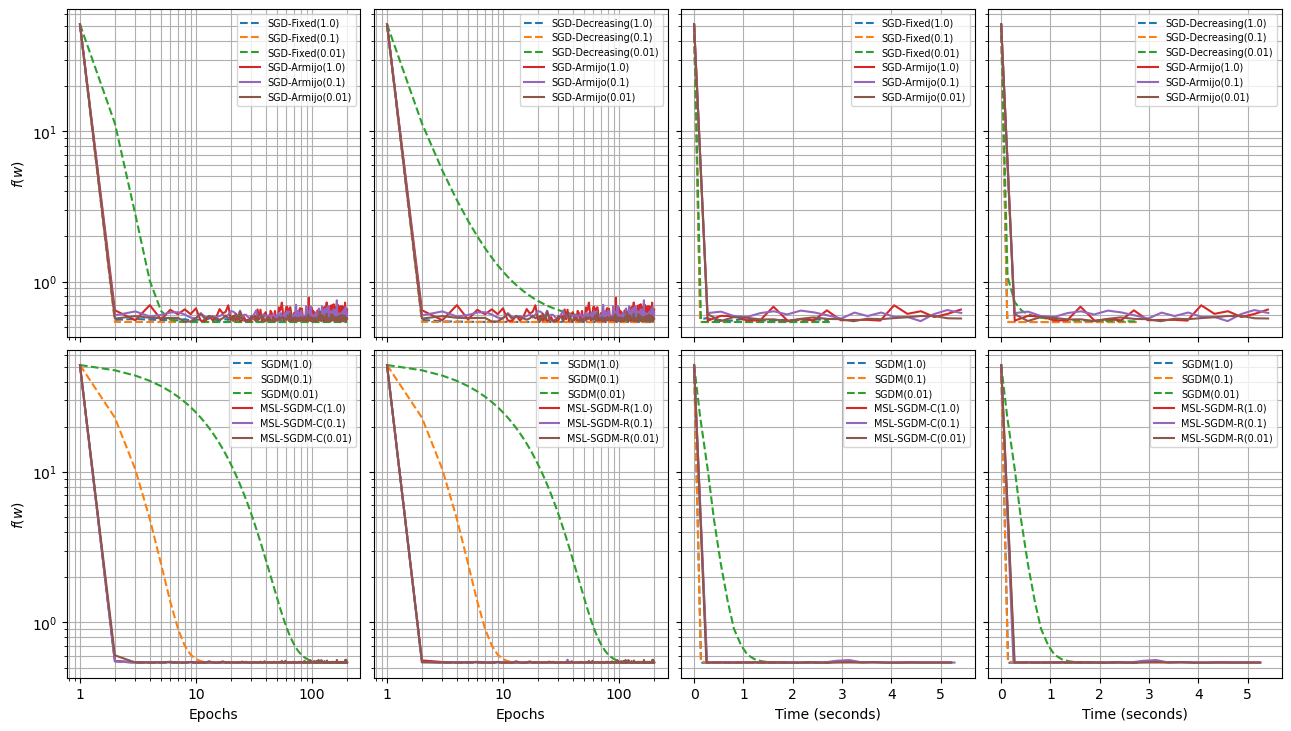

In [10]:
diagnostic(
    optim_data(sgdfixed_w1a + sgdarmijo_w1a),
    optim_data(sgddecre_w1a + sgdarmijo_w1a),
    optim_data(sgdm_w1a + mslc_w1a),
    optim_data(sgdm_w1a + mslr_w1a),
    benchw1a[0])
plt.savefig("./plots/w1a-diagnostic.pdf")

## Fine-tuning

In [11]:
batchfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, data_w1a[1].size, 0.75)

sgdfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, Mw1a, 0.005)

sgddecre_w1a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w1a, Mw1a, 1)

sgdm_w1a1 = LogisticRegression("SGDM", C).fit(data_w1a, Mw1a, 0.01, 0.9)

In [16]:
sgdarmijo_w1a1 = LogisticRegression("SGD-Armijo", C).fit(data_w1a, Mw1a, 1, damp_armijo=0.9, gamma_armijo=0.01)

In [ ]:
mslc_w1a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w1a, Mw1a, 1, 0.9, damp_armijo=0.9, gamma_armijo=0.01, damp_momentum=0.9)

mslr_w1a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w1a, Mw1a, 1, 0.9, damp_armijo=0.9, gamma_armijo=0.01, damp_momentum=0.9)

In [17]:
fine_w1a_data = optim_data([batchfixed_w1a1, sgdfixed_w1a1, sgddecre_w1a1, sgdm_w1a1, sgdarmijo_w1a1, mslc_w1a1, mslr_w1a1])

test_w1a = models_summary(fine_w1a_data, benchw1a_data)
test_w1a.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.537485,0.000007,NaN,6,0.970933,0.970236,0.500000,0.500000,0.439818
0,L-BFGS-B,1,NaN,NaN,NaN,0.537485,0.000001,NaN,7,0.970933,0.970236,0.500000,0.500000,0.439818
2,CG,1,NaN,NaN,NaN,0.537485,0.000022,NaN,8,0.970933,0.970236,0.500000,0.500000,0.439813
3,SGD-Fixed,1,2477.0,0.750,0.0,0.537485,0.000553,0.000000,7,0.970933,0.970236,0.500000,0.500000,0.439819
5,SGD-Decreasing,1,32.0,1.000,0.0,0.537485,0.000863,2.964167,215,0.970933,0.970236,0.500000,0.500000,0.439966
4,SGD-Fixed,1,32.0,0.005,0.0,0.537485,0.000977,0.541091,38,0.970933,0.970236,0.500000,0.500000,0.439542
6,SGDM,1,32.0,0.010,0.9,0.537485,0.000956,3.225178,237,0.970933,0.970236,0.500000,0.500000,0.439711
9,MSL-SGDM-R,1,32.0,1.000,0.9,0.541797,0.095733,11.796699,400,0.970933,0.970236,0.500000,0.500000,0.452646
8,MSL-SGDM-C,1,32.0,1.000,0.9,0.541797,0.095735,11.781282,400,0.970933,0.970236,0.500000,0.500000,0.452647
7,SGD-Armijo,1,32.0,1.000,0.0,0.583578,0.316035,10.834323,400,0.971740,0.970448,0.513889,0.503554,0.471047


In [14]:
print(test_w1a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS-B & NaN & 7 & NaN & 0.537485 & 0.000001 & 0.970236 \\
Newton-CG & NaN & 6 & NaN & 0.537485 & 0.000007 & 0.970236 \\
CG & NaN & 8 & NaN & 0.537485 & 0.000022 & 0.970236 \\
SGD-Fixed & 0.750000 & 7 & 0.011356 & 0.537485 & 0.000553 & 0.970236 \\
SGD-Fixed & 0.005000 & 38 & 0.195407 & 0.537485 & 0.000977 & 0.970236 \\
SGD-Decreasing & 1.000000 & 215 & 1.115338 & 0.537485 & 0.000863 & 0.970236 \\
SGDM & 0.010000 & 237 & 1.280962 & 0.537485 & 0.000956 & 0.970236 \\
SGD-Armijo & 1.000000 & 400 & 4.310778 & 0.575362 & 0.297775 & 0.970236 \\
MSL-SGDM-C & 1.000000 & 400 & 4.387692 & 0.541797 & 0.095734 & 0.970236 \\
MSL-SGDM-R & 1.000000 & 400 & 4.393565 & 0.541797 & 0.095733 & 0.970236 \\
\bottomrule
\end{tabular}



# w3a

In [11]:
data_w3a = load_w3a()

X_train = (4912, 300), y_train = (4912,)
X_test = (44837, 300), y_test = (44837,)
Class distribution: {-1.0: 0.9708876221498371, 1.0: 0.029112377850162866}
sklearn train score: 0.984731
sklearn test score: 0.979771
sklearn balanced train score: 0.754721
sklearn balanced test score: 0.698281
sklearn sol norm: 11.108426556598092


In [12]:
#CBreast = 1
Mw3a = 64
#kBreast = 200
print(f"Iterations: {data_w3a[1].size / Mw3a}")

Iterations: 76.75


## Benchmark

In [13]:
benchw3a = run_bench(data_w3a, C)

benchw3a_data = optim_bench(benchw3a)

## SGD

In [14]:
# BatchGD-Fixed
batchfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, data_w3a[1].size)

# SGD-Fixed
sgdfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, Mw3a)

# SGD-Decreasing
sgddecre_w3a = run_solvers("SGD-Decreasing", C, data_w3a, Mw3a)

# SGDM
sgdm_w3a = run_solvers("SGDM", C, data_w3a, Mw3a)

# SGD-Armijo
sgdarmijo_w3a = run_solvers("SGD-Armijo", C, data_w3a, Mw3a)

# MSL-SGDM-C
mslc_w3a = run_solvers("MSL-SGDM-C", C, data_w3a, Mw3a)

# MSL-SGDM-R
mslr_w3a = run_solvers("MSL-SGDM-R", C, data_w3a, Mw3a)

In [15]:
modelsw3a_data = optim_data(batchfixed_w3a + sgdfixed_w3a + sgddecre_w3a + sgdm_w3a + sgdarmijo_w3a + mslc_w3a + mslr_w3a)

## Summary

In [16]:
models_summary(modelsw3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.535620,9.196256e-06,NaN,6,0.970888,0.970203,0.50000,0.500000,0.440440
3,SGD-Fixed,1,4912.0,1.00,0.0,0.535620,1.810997e-15,0.267779,200,0.970888,0.970203,0.50000,0.500000,0.440440
4,SGD-Fixed,1,4912.0,0.10,0.0,0.535620,6.348595e-09,0.265512,200,0.970888,0.970203,0.50000,0.500000,0.440440
0,L-BFGS-B,1,NaN,NaN,NaN,0.535620,1.254645e-06,NaN,7,0.970888,0.970203,0.50000,0.500000,0.440440
2,CG,1,NaN,NaN,NaN,0.535620,3.881796e-06,NaN,10,0.970888,0.970203,0.50000,0.500000,0.440442
10,SGD-Decreasing,1,64.0,0.10,0.0,0.535620,4.293885e-05,2.828184,200,0.970888,0.970203,0.50000,0.500000,0.440451
9,SGD-Decreasing,1,64.0,1.00,0.0,0.535620,7.444813e-04,2.830690,200,0.970888,0.970203,0.50000,0.500000,0.440427
13,SGDM,1,64.0,0.10,0.9,0.535622,1.969105e-03,2.832834,200,0.970888,0.970203,0.50000,0.500000,0.440179
8,SGD-Fixed,1,64.0,0.01,0.0,0.535622,2.234215e-03,2.823864,200,0.970888,0.970203,0.50000,0.500000,0.440359
14,SGDM,1,64.0,0.01,0.9,0.535625,3.113314e-03,2.821298,200,0.970888,0.970203,0.50000,0.500000,0.440309


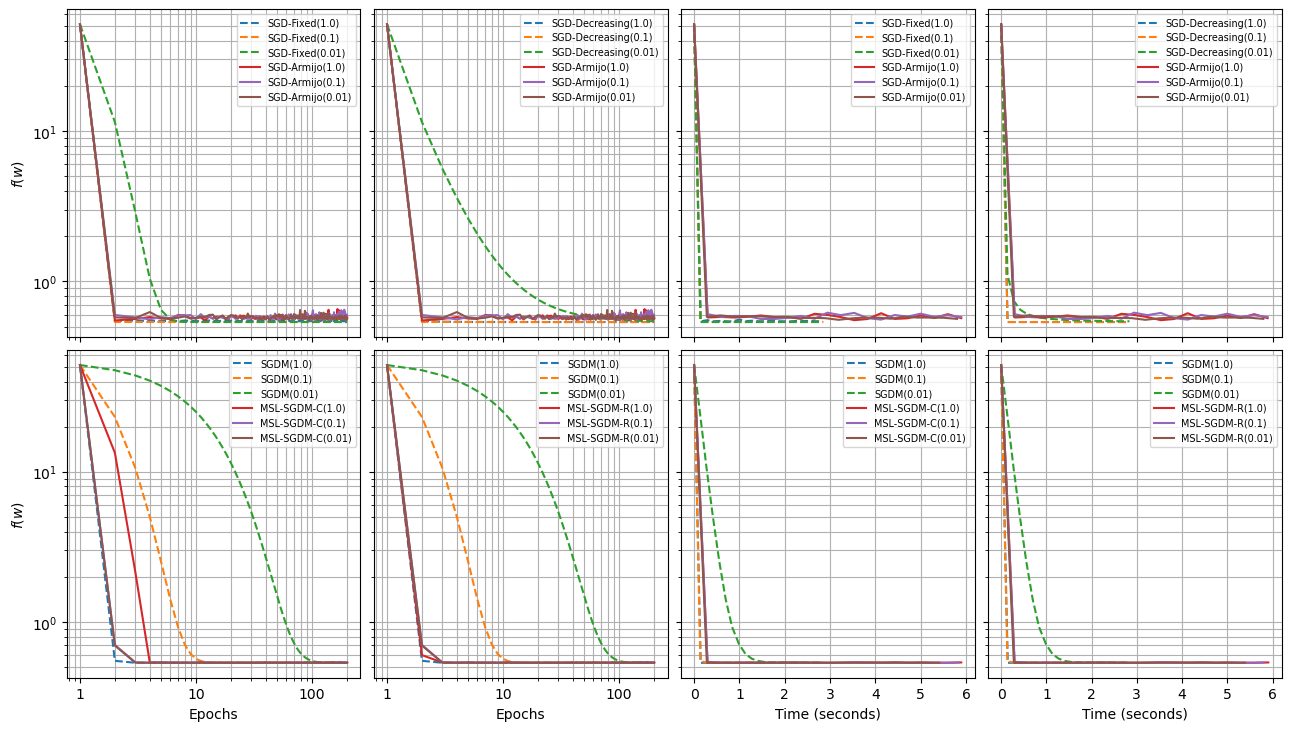

In [17]:
diagnostic(
    optim_data(sgdfixed_w3a + sgdarmijo_w3a),
    optim_data(sgddecre_w3a + sgdarmijo_w3a),
    optim_data(sgdm_w3a + mslc_w3a),
    optim_data(sgdm_w3a + mslr_w3a),
    benchw3a[0])
plt.savefig("./plots/w3a-diagnostic.pdf")

## Fine-tuning

In [ ]:
batchfixed_w3a1 = LogisticRegression("SGD-Fixed", C).fit(data_w3a, data_w3a[1].size, 0.75)

sgdfixed_w3a1 = LogisticRegression("SGD-Fixed", C).fit(data_w3a, Mw3a, 0.005)

sgddecre_w3a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w3a, Mw3a, 1)

sgdm_w3a1 = LogisticRegression("SGDM", C).fit(data_w3a, Mw3a, 0.04, 0.9)

sgdarmijo_w3a1 = LogisticRegression("SGD-Armijo", C).fit(data_w3a, Mw3a, 0.05)

mslc_w3a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w3a, Mw3a, 0.5, 0.9)

mslr_w3a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w3a, Mw3a, 0.75, 0.9)

In [ ]:
fine_w3a_data = optim_data([batchfixed_w3a1, sgdfixed_w3a1, sgddecre_w3a1, sgdm_w3a1, sgdarmijo_w3a1, mslc_w3a1, mslr_w3a1])

test_w3a = models_summary(fine_w3a_data, benchw3a_data)
test_w3a.sort_values(by=["l2-Loss", "Grad norm"])

In [ ]:
print(test_w3a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

# Phishing

In [18]:
data_phish = load_phishing()

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Class distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}
sklearn train score: 0.938263
sklearn test score: 0.934871
sklearn balanced train score: 0.936161
sklearn balanced test score: 0.931415
sklearn sol norm: 24.265378392894867


In [19]:
#Csvm = 1
Mphish = 64
#ksvm = 200
print(f"Iterations: {data_phish[1].size / Mphish}")

Iterations: 138.1875


## Benchmark

In [20]:
benchphish = run_bench(data_phish, C)

benchphish_data = optim_bench(benchphish)

## SGD

In [21]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, data_phish, data_phish[1].size)

# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, data_phish, Mphish)

# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, data_phish, Mphish)

# SGDM
sgdm_phish = run_solvers("SGDM", C, data_phish, Mphish)

# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, data_phish, Mphish)

# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, data_phish, Mphish)

# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, data_phish, Mphish)

In [22]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [23]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,1,8844.0,1.00,0.0,0.688678,1.579046e-16,0.561178,200,0.554274,0.567616,0.500000,0.500000,0.088571
4,SGD-Fixed,1,8844.0,0.10,0.0,0.688678,3.121932e-09,0.530489,200,0.554274,0.567616,0.500000,0.500000,0.088571
1,Newton-CG,1,NaN,NaN,NaN,0.688678,9.115179e-09,NaN,5,0.554274,0.567616,0.500000,0.500000,0.088571
10,SGD-Decreasing,1,64.0,0.10,0.0,0.688678,1.669308e-05,5.077956,200,0.554274,0.567616,0.500000,0.500000,0.088568
2,CG,1,NaN,NaN,NaN,0.688678,1.911229e-05,NaN,4,0.554274,0.567616,0.500000,0.500000,0.088573
0,L-BFGS-B,1,NaN,NaN,NaN,0.688678,2.189414e-05,NaN,5,0.554274,0.567616,0.500000,0.500000,0.088567
17,SGDM,1,64.0,0.01,0.9,0.688678,2.918960e-04,5.047056,200,0.554274,0.567616,0.500000,0.500000,0.088676
16,SGDM,1,64.0,0.10,0.9,0.688678,5.455819e-04,5.046880,200,0.554274,0.567616,0.500000,0.500000,0.088689
9,SGD-Decreasing,1,64.0,1.00,0.0,0.688679,1.019405e-03,5.073121,200,0.554274,0.567616,0.500000,0.500000,0.088181
11,SGD-Decreasing,1,64.0,0.01,0.0,0.688679,1.331103e-03,5.078260,200,0.554274,0.567616,0.500000,0.500000,0.088580


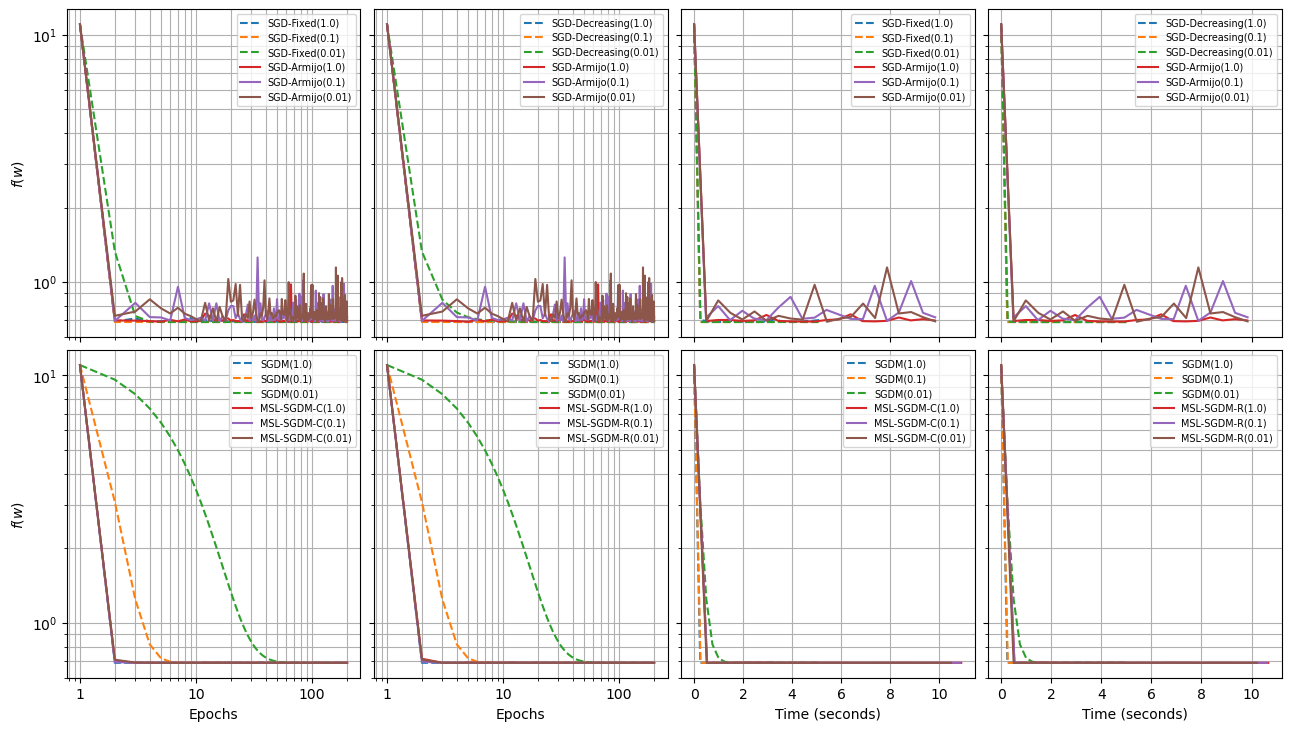

In [24]:
diagnostic(
    optim_data(sgdfixed_phish + sgdarmijo_phish),
    optim_data(sgddecre_phish + sgdarmijo_phish),
    optim_data(sgdm_phish + mslc_phish),
    optim_data(sgdm_phish + mslr_phish),
    benchphish[0])
plt.savefig("./plots/phish-diagnostic.pdf")

## Fine-tuning

In [ ]:
batchfixed_phish1 = LogisticRegression("SGD-Fixed", C).fit(data_phish, data_phish[1].size, 0.75)

sgdfixed_phish1 = LogisticRegression("SGD-Fixed", C).fit(data_phish, Mphish, 0.01)

sgddecre_phish1 = LogisticRegression("SGD-Decreasing", C).fit(data_phish, Mphish, 1)

sgdm_phish1 = LogisticRegression("SGDM", C).fit(data_phish, Mphish, 0.05, 0.9)

sgdarmijo_phish1 = LogisticRegression("SGD-Armijo", C).fit(data_phish, Mphish, 1)

mslc_phish1 = LogisticRegression("MSL-SGDM-C", C).fit(data_phish, Mphish, 1, 0.9)

mslr_phish1 = LogisticRegression("MSL-SGDM-R", C).fit(data_phish, Mphish, 1, 0.9)

fine_phish_data = optim_data([batchfixed_phish1, sgdfixed_phish1, sgddecre_phish1, sgdm_phish1, sgdarmijo_phish1, mslc_phish1, mslr_phish1])

In [ ]:
test_phish = models_summary(fine_phish_data, benchphish_data)
test_phish.sort_values(by=["l2-Loss", "Grad norm"])

In [ ]:
print(test_phish[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

# a2a

In [ ]:
data_a2a = load_a2a()

In [ ]:
#CAustr = 1
Ma2a = 32
#kAustr = 200
print(f"Iterations: {data_a2a[1].size / Ma2a}")

## Benchmark

In [ ]:
bencha2a = run_bench(data_a2a, C)

bencha2a_data = optim_bench(bencha2a)

## SGD

In [ ]:
# BatchGD-Fixed
batchfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, data_a2a[1].size)

# SGD-Fixed
sgdfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, Ma2a)

# SGD-Decreasing
sgddecre_a2a = run_solvers("SGD-Decreasing", C, data_a2a, Ma2a)

# SGDM
sgdm_a2a = run_solvers("SGDM", C, data_a2a, Ma2a)

# SGD-Armijo
sgdarmijo_a2a = run_solvers("SGD-Armijo", C, data_a2a, Ma2a)

# MSL-SGDM-C
mslc_a2a = run_solvers("MSL-SGDM-C", C, data_a2a, Ma2a)

# MSL-SGDM-R
mslr_a2a = run_solvers("MSL-SGDM-R", C, data_a2a, Ma2a)

In [ ]:
modelsa2a_data = optim_data(batchfixed_a2a + sgdfixed_a2a + sgddecre_a2a + sgdm_a2a + sgdarmijo_a2a + mslc_a2a + mslr_a2a)

## Summary

In [ ]:
models_summary(modelsa2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])

In [ ]:
diagnostic(
    optim_data(sgdfixed_a2a + sgdarmijo_a2a),
    optim_data(sgddecre_a2a + sgdarmijo_a2a),
    optim_data(sgdm_a2a + mslc_a2a),
    optim_data(sgdm_a2a + mslr_a2a),
    bencha2a[0])
plt.savefig("./plots/a2a-diagnostic.pdf")

## Fine-tuning

In [ ]:
batchfixed_a2a1 = LogisticRegression("SGD-Fixed", C).fit(data_a2a, data_a2a[1].size, 0.2)

sgdfixed_a2a1 = LogisticRegression("SGD-Fixed", C).fit(data_a2a, Ma2a, 0.001)

sgddecre_a2a1 = LogisticRegression("SGD-Decreasing", C).fit(data_a2a, Ma2a, 0.05)

sgdm_a2a1 = LogisticRegression("SGDM", C).fit(data_a2a, Ma2a, 0.02, 0.9)

sgdarmijo_a2a1 = LogisticRegression("SGD-Armijo", C).fit(data_a2a, Ma2a, 0.01)

mslc_a2a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_a2a, Ma2a, 0.75, 0.9)

mslr_a2a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_a2a, Ma2a, 0.75, 0.9)

In [ ]:
fine_a2a_data = optim_data([batchfixed_a2a1, sgdfixed_a2a1, sgddecre_a2a1, sgdm_a2a1, sgdarmijo_a2a1, mslc_a2a1, mslr_a2a1])

test_a2a = models_summary(fine_a2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_a2a

In [ ]:
print(test_a2a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

# Mushrooms

In [ ]:
data_mush = load_mushrooms()

In [ ]:
#Cmush = 1
Mmush = 64
#kmush = 200
print(f"Iterations: {data_mush[1].size / Mmush}")

## Benchmark

In [ ]:
benchMush = run_bench(data_mush, C)

benchMush_data = optim_bench(benchMush)

## SGD

In [ ]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, data_mush, data_mush[1].size)

# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, data_mush, Mmush)

# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, data_mush, Mmush)

# SGDM
sgdm_mush = run_solvers("SGDM", C, data_mush, Mmush)

# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, data_mush, Mmush)

# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, data_mush, Mmush)

# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, data_mush, Mmush)

In [ ]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [ ]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

In [ ]:
diagnostic(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-diagnostic.pdf")

## Fine-tuning

In [ ]:
batchfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, data_mush[1].size, 0.05)

sgdfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, Mmush, 0.001)

sgddecre_mush1 = LogisticRegression("SGD-Decreasing", C).fit(data_mush, Mmush, 0.1)

sgdm_mush1 = LogisticRegression("SGDM", C).fit(data_mush, Mmush, 0.03, 0.9)

sgdarmijo_mush1 = LogisticRegression("SGD-Armijo", C).fit(data_mush, Mmush, 0.01)

mslc_mush1 = LogisticRegression("MSL-SGDM-C", C).fit(data_mush, Mmush, 0.025, 0.9)

mslr_mush1 = LogisticRegression("MSL-SGDM-R", C).fit(data_mush, Mmush, 0.025, 0.9)

In [ ]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])
test_mush

In [ ]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

# German

In [ ]:
data_german = load_german()

In [ ]:
#Cgerman = 1
Mgerman = 8
#kgerman = 200
print(f"Iterations: {data_german[1].size / Mgerman}")

## Benchmark

In [ ]:
benchgerman = run_bench(data_german, C)

benchgerman_data = optim_bench(benchgerman)

## SGD

In [ ]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, data_german, data_german[1].size)

# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, data_german, Mgerman)

# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, data_german, Mgerman)

# SGDM
sgdm_german = run_solvers("SGDM", C, data_german, Mgerman)

# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, data_german, Mgerman)

# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, data_german, Mgerman)

# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, data_german, Mgerman)

In [ ]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [ ]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

In [ ]:
diagnostic(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-diagnostic.pdf")

## Fine-tuning

In [ ]:
batchfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, data_german[1].size, 0.5)

sgdfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, Mgerman, 0.001)

sgddecre_german1 = LogisticRegression("SGD-Decreasing", C).fit(data_german, Mgerman, 0.25)

sgdm_german1 = LogisticRegression("SGDM", C).fit(data_german, Mgerman, 0.005, 0.9)

sgdarmijo_german1 = LogisticRegression("SGD-Armijo", C).fit(data_german, Mgerman, 0.05)

mslc_german1 = LogisticRegression("MSL-SGDM-C", C).fit(data_german, Mgerman, 0.5, 0.9)

mslr_german1 = LogisticRegression("MSL-SGDM-R", C).fit(data_german, Mgerman, 0.5, 0.9)

In [ ]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])
test_german

In [ ]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))